Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week3.php" -OutFile "week3.csv"

# id:13-13--13 

https://github.com/Chenmo1212/TCD-Machine_Learning/blob/main/00_Weekly%20Assignments(ML)/02_Week_3/02_Jupyter/Untitled.ipynb

In [31]:
import numpy as np
data = np.loadtxt('week3.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
X_0 = data[:, 0]
X_1 = data[:, 1]
X_2 = data[:, 2]

In [20]:
from sklearn.model_selection import train_test_split

# Use the train:test to divide the dataset with a ratio of 2:8
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Question (i)a

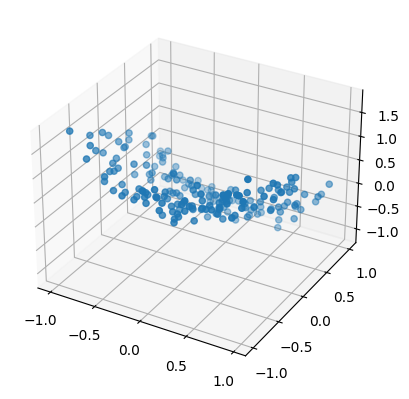

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

Question i(b)

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

def lasso_regression_model(x, y, model_name, degree_poly, test_c_vals):
    x_poly = PolynomialFeatures(degree_poly).fit_transform(x)
    results_dfs = []

    for c in test_c_vals:
        if model_name == 'Lasso':
            model = Lasso(alpha=1 / (2 * c))
        elif model_name == 'Ridge':
            model = Ridge(alpha=1 / (2 * c))

        model.fit(x_poly, y)

        result_dict = {
            'C_value': c,
            'coefficient': np.around(model.coef_, decimals=2),
            'intercept': model.intercept_
        }

        results_dfs.append(pd.DataFrame([result_dict]))

    model_results = pd.concat(results_dfs, ignore_index=True)
    return model_results

C_values = [1, 10, 100, 1000]
model_name = 'Lasso'

for degree_poly in range(len(C_values)):
    result = lasso_regression_model(X, y, model_name, degree_poly, C_values)
    with pd.option_context('display.max_colwidth', 400):
        print(f'Parameters for degree of polynomial feature = {degree_poly}')
        display(result)


Parameters for degree of polynomial feature = 0


,C_value,coefficient,intercept
0,1,[0.0],0.320287
1,10,[0.0],0.320287
2,100,[0.0],0.320287
3,1000,[0.0],0.320287


Parameters for degree of polynomial feature = 1


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.82]",0.313954
2,100,"[0.0, 0.01, -0.95]",0.312879
3,1000,"[0.0, 0.02, -0.97]",0.312610


Parameters for degree of polynomial feature = 2


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.84, 0.37, -0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.99, 0.86, 0.0, -0.06]",0.053157
3,1000,"[0.0, 0.01, -1.0, 0.91, 0.0, -0.1]",0.055228


Parameters for degree of polynomial feature = 3


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.84, 0.37, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.94, 0.86, 0.0, -0.05, 0.0, 0.0, 0.0, -0.09]",0.052418
3,1000,"[0.0, 0.01, -0.91, 0.91, 0.0, -0.1, -0.0, 0.03, -0.0, -0.16]",0.053745


X1 = [[1, 2, 3],
      [1, 2, 3],
      [1, 2, 3]]

X2 = [[10, 10, 10],
      [20, 20, 20],
      [30, 30, 30]]

Question i(c)

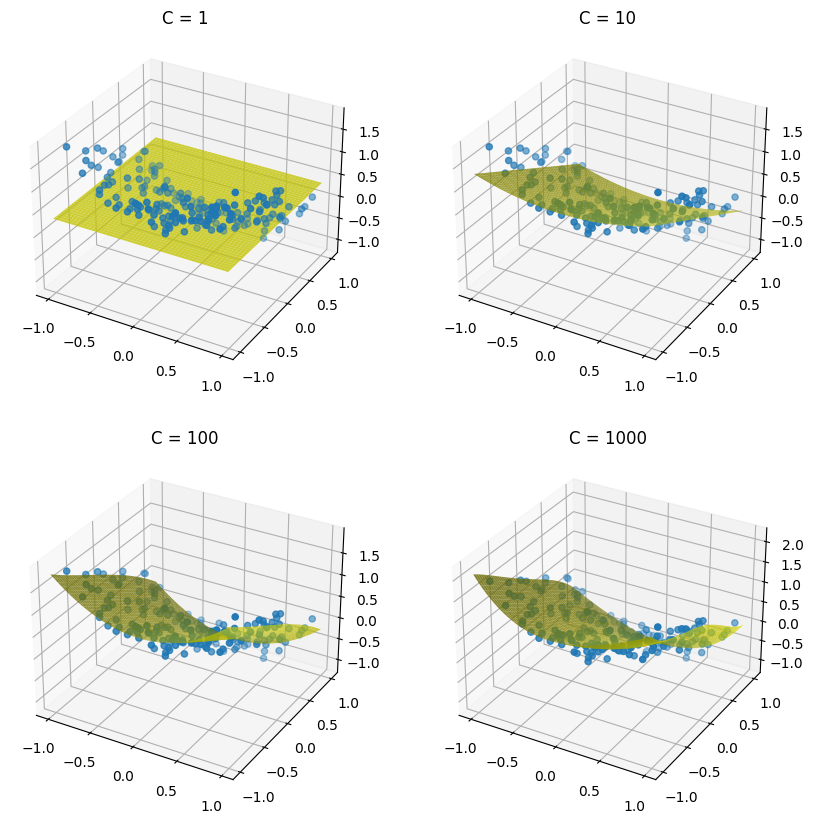

In [38]:
from sklearn.pipeline import Pipeline

def lasso_regression_model_cont(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Lasso(alpha=alpha))
    ])

model_list = [lasso_regression_model_cont(5, 1/(2*c)).fit(x_train, y_train) for c in C_values]

fig = plt.figure(figsize=(10, 10))

x1 = np.linspace(X[:, 0].min(), X[:, 0].max())
x2 = np.linspace(X[:, 1].min(), X[:, 1].max())
X1, X2 = np.meshgrid(x1, x2)

for i, model in enumerate(model_list):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    ax.scatter(X_0, X_1, X_2)

    Z = np.array([model.predict(np.column_stack((X1[j], X2[j]))) for j in range(len(X1))])

    surf = ax.plot_surface(X1, X2, Z, color='yellow', alpha=0.8)
    plt.title("C = {}".format(C_values[i]))

plt.show()


It defines a custom Lasso regression function called LassoRegression that takes two parameters: the degree of polynomial features and the alpha (regularization strength).

It creates a list of Lasso regression models with different levels of regularization (C values) and fits these models to training data. This allows you to see how different levels of regularization affect the model's predictions.

It sets up a 3D plot using Matplotlib to visualize the data and the predictions of the Lasso regression models. The plot has four subplots, and each subplot represents a different Lasso regression model with varying regularization strength (C).

Inside the loop that iterates through the models, it does the following for each model:

a. Sets up a 3D subplot with labels for the x, y, and z-axes.

b. Scatters the original data points in the 3D space.

c. Calculates predictions for the 3D surface by using the Lasso regression model and a mesh grid of x1 and x2 values (the input features) to cover the entire space.

d. Plots a 3D surface using the calculated predictions, with the color of the surface being set to 'yellow'.

Question i(d)

explain

Question i(e)

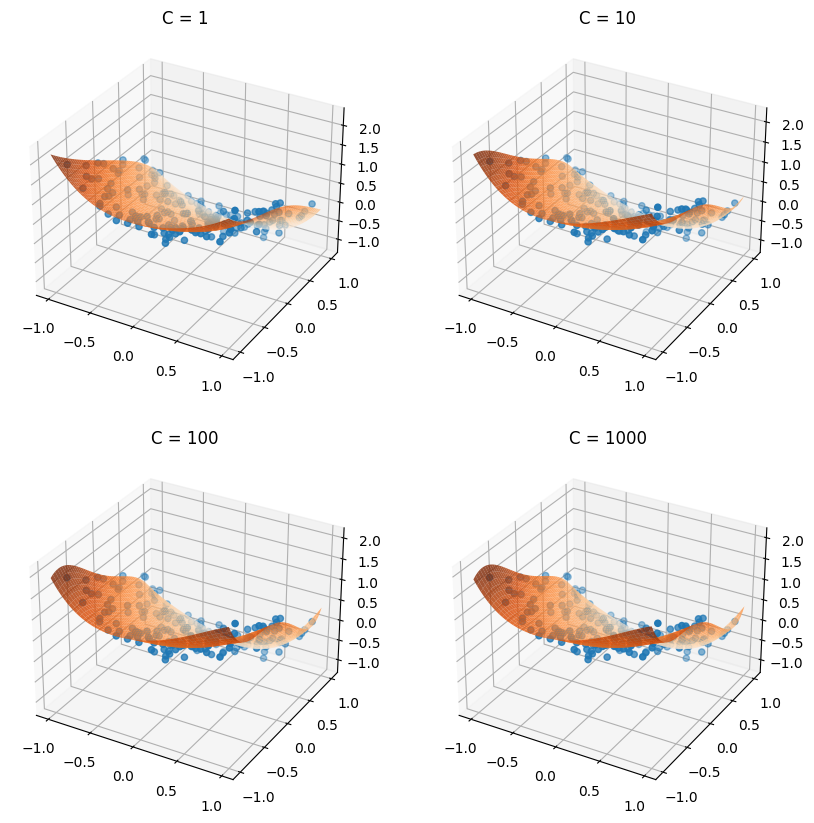

In [41]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Ridge(alpha=alpha))
    ])

ridge_model_list = [RidgeRegression(5, 1/(2*c)).fit(x_train, y_train) for c in C_values]

fig = plt.figure(figsize=(10, 10))

x1 = np.linspace(X[:, 0].min(), X[:, 0].max())
x2 = np.linspace(X[:, 1].min(), X[:, 1].max())
X1, X2 = np.meshgrid(x1, x2)

for i, (model, c) in enumerate(zip(ridge_model_list, C_values), start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    ax.scatter(X_0, X_1, X_2)

    Z = model.predict(np.column_stack((X1.ravel(), X2.ravel()))).reshape(X1.shape)

    surf = ax.plot_surface(X1, X2, Z, cmap='Oranges', alpha=0.8)
    plt.title("C = {}".format(c))

plt.show()
